# Importing

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Part1: Data Cleaning

In [2]:
# find file paths and load data
import h5py
import os
print(os.path.abspath('.'))

/Users/christxx/Desktop/INFO664/Trending-Youtube-Videos-Analysis


Combining the data of two English-speaking countries to avoid the potential error caused by language.

In [3]:
video_db = pd.DataFrame()
for country in ['US', 'CA']:
    video_df = pd.read_csv('/Users/christxx/Desktop/INFO664/Projects/data/{country}videos.csv'.format(country=country))
    video_df['country'] = country
    video_db = pd.concat([video_df, video_db])

In [4]:
video_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81830 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                81830 non-null  object
 1   trending_date           81830 non-null  object
 2   title                   81830 non-null  object
 3   channel_title           81830 non-null  object
 4   category_id             81830 non-null  int64 
 5   publish_time            81830 non-null  object
 6   tags                    81830 non-null  object
 7   views                   81830 non-null  int64 
 8   likes                   81830 non-null  int64 
 9   dislikes                81830 non-null  int64 
 10  comment_count           81830 non-null  int64 
 11  thumbnail_link          81830 non-null  object
 12  comments_disabled       81830 non-null  bool  
 13  ratings_disabled        81830 non-null  bool  
 14  video_error_or_removed  81830 non-null  bool  
 15  de

In [5]:
video = video_db 

In [6]:
video.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...,CA
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...,CA
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,CA
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...,CA
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,False,False,False,Sheldon is roasting pastor of the church\nyoun...,CA


In [7]:
video.shape

(81830, 17)

In [8]:
# check values ranges in categorical columns
video_catv = video.select_dtypes(include=['bool'])
for col in video_catv.columns:
  print("Attribute", str(col))
  print(video_catv[col].value_counts().sort_index(), end='\n\n')

Attribute comments_disabled
False    80614
True      1216
Name: comments_disabled, dtype: int64

Attribute ratings_disabled
False    81382
True       448
Name: ratings_disabled, dtype: int64

Attribute video_error_or_removed
False    81780
True        50
Name: video_error_or_removed, dtype: int64



Delete videos containing null value or turn off comments and ratings. 

In [9]:
video = video.drop(["country"], 1)
video.isnull().sum()
video = video.replace('?', np.nan)
video = video.dropna(axis=0, how='any')

In [10]:
video_filtered = video[video['comments_disabled'] == False]
video_filtered = video[video['ratings_disabled'] == False]

In [11]:
video_filtered.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,False,False,False,Sheldon is roasting pastor of the church\nyoun...


In [12]:
video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79964 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                79964 non-null  object
 1   trending_date           79964 non-null  object
 2   title                   79964 non-null  object
 3   channel_title           79964 non-null  object
 4   category_id             79964 non-null  int64 
 5   publish_time            79964 non-null  object
 6   tags                    79964 non-null  object
 7   views                   79964 non-null  int64 
 8   likes                   79964 non-null  int64 
 9   dislikes                79964 non-null  int64 
 10  comment_count           79964 non-null  int64 
 11  thumbnail_link          79964 non-null  object
 12  comments_disabled       79964 non-null  bool  
 13  ratings_disabled        79964 non-null  bool  
 14  video_error_or_removed  79964 non-null  bool  
 15  de

# Part2: Data Visualization

### 1.Top ten videos with popular video ids in North America

In [13]:
video_filtered_top30views = video_filtered.nlargest(30,'views')
video_filtered_top30views.head(20)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
38345,VYOjWnS4cMY,18.01.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",220490543,4962403,338105,512337,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
38146,VYOjWnS4cMY,18.31.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",217750076,4934188,335462,509799,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37935,VYOjWnS4cMY,18.30.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",210338856,4836448,326902,501722,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37730,VYOjWnS4cMY,18.29.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",205643016,4776680,321493,496211,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37531,VYOjWnS4cMY,18.28.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",200820941,4714942,316129,491005,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37333,VYOjWnS4cMY,18.27.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",196222618,4656929,311042,485797,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37123,VYOjWnS4cMY,18.26.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",190950401,4594931,305435,479917,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
36913,VYOjWnS4cMY,18.25.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",184446490,4512326,298157,473039,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
36710,VYOjWnS4cMY,18.24.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",179045286,4437175,291098,466470,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...


### 2. Bar chart: trending video IDs vs Number of Views

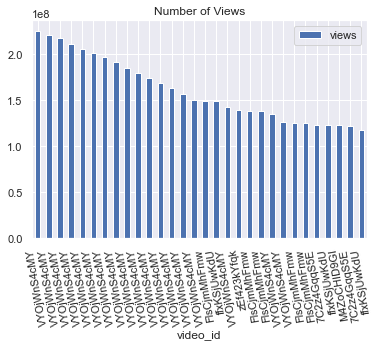

In [36]:
# Draw a vertical bar chart

video_filtered_top30views.plot.bar(x="video_id", y="views", rot=100, title="Number of Views");
plt.show(block=True);

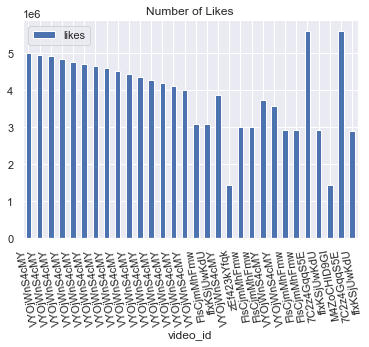

In [35]:
# Draw a vertical bar chart

video_filtered_top30views.plot.bar(x="video_id", y="likes", rot=100, title="Number of Likes");
plt.show(block=True);

### 3. What kind of content are the accounts producing?

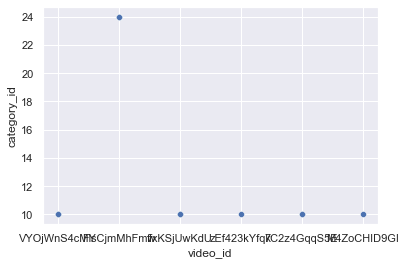

In [37]:
# use the scatterplot function to build the bubble map

sns.scatterplot(data=video_filtered_top30views, x="video_id", y="category_id", legend=False, sizes=(20, 2000))

# show the graph
plt.show()

### 4. correlation chart

In [17]:
# correlation between fetures
video_numv = video.select_dtypes(include=['int64', 'float64'])
video_numv.corr(method ='pearson')

,category_id,views,likes,dislikes,comment_count
category_id,1.000000,-0.158519,-0.165329,-0.041414,-0.082257
views,-0.158519,1.000000,0.842144,0.539592,0.659380
likes,-0.165329,0.842144,1.000000,0.491229,0.848482
dislikes,-0.041414,0.539592,0.491229,1.000000,0.625704
comment_count,-0.082257,0.659380,0.848482,0.625704,1.000000


In [18]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

for col in video.columns.values:
    # If the dtype is object, then do the numeric transformation
    if video[col].dtype=='bool':
        video[col]=LabelEncoder.fit_transform(video[col].astype(object))

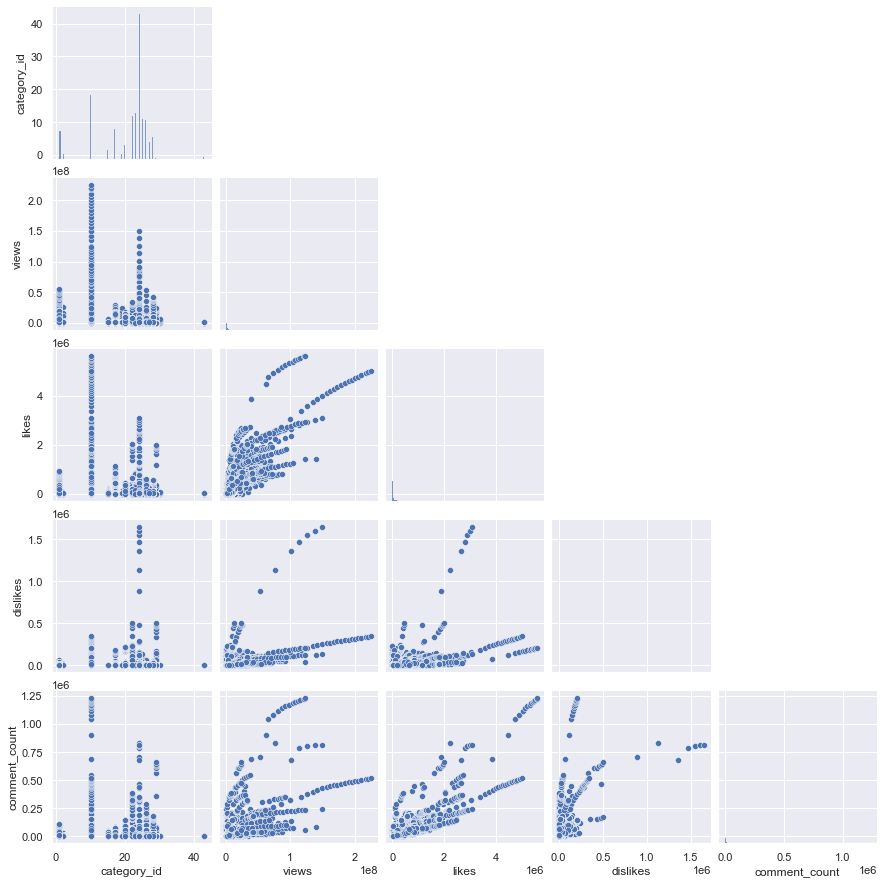

In [19]:
import seaborn as sns
sns.set(style="darkgrid")

video_correlation = video_filtered.drop(["comments_disabled","ratings_disabled","video_error_or_removed","thumbnail_link"],1)

# data visualization of features
graph1 = sns.pairplot(video_correlation, height=2.5)
for i, j in zip(*np.triu_indices_from(graph1.axes, 1)):
    graph1.axes[i, j].set_visible(False)

# Part3: Predicting Views 
User engagement(Comments/Likes) is crucial to the popularity of videos. By analyzing the data of trending video, I create function of predicting number of comments for being a trending video. Creators can analyze whether their current videos need to be strengthened to increase user engagement.

## 1. Import dataset

In [20]:
#split dataset
X = video_filtered.drop(["comment_count","description","title","thumbnail_link","publish_time","comments_disabled","ratings_disabled","tags","trending_date","video_id","channel_title","video_error_or_removed"],1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79523 entries, 0 to 40948
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   category_id  79523 non-null  int64
 1   views        79523 non-null  int64
 2   likes        79523 non-null  int64
 3   dislikes     79523 non-null  int64
dtypes: int64(4)
memory usage: 3.0 MB


In [21]:
y = video_filtered['comment_count']
y.head(10)

0    125882
1     13030
2      8181
3     17518
4     85067
5     12143
6     26629
7     15959
8     36391
9      1484
Name: comment_count, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=8)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((47713, 4), (47713,), (31810, 4), (31810,))

## 2. Preposessing

In [52]:
from sklearn.preprocessing import StandardScaler
# check how StandardScaler is changing the mean and std of the data - for column 0
approval_scaled = StandardScaler().fit_transform(X)
approval_scaled[:, 0].mean(), approval_scaled[:, 0].std()

(-1.086503233887406e-16, 1.0)

## 3. Train the model

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler

In [54]:
# Create linear regression object
from sklearn import linear_model
# regr = LogisticRegression(random_state=0, max_iter =100000) 0.117
regr = linear_model.LinearRegression()

In [55]:
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
step_list = [('scaler', StandardScaler()), 
             ('regr', regr)
            ]
pipe = Pipeline(steps=step_list)
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('regr', LinearRegression())])

In [56]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('regr', LinearRegression())])

## 4. Evaluation

In [57]:
pipe.score(X_test, y_test)

0.818746817269269

In [58]:
# Make predictions using the testing set
y_pred = pipe.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 1057.82858441 -9101.51079761 26834.24651704  8051.74782211]
Mean squared error: 182049579.74
Coefficient of determination: 0.82


## 5. Function to predict

In [61]:
def views_model_test(row):
    model = pipe.fit(X_train, y_train)
    result = model.predict(row)
    return result

In [62]:
views_test_set = [[24,300000,5000,1000]]
views_model_test(views_test_set)

array([1169.48228674])

In [63]:
X_train.head(10)

,category_id,views,likes,dislikes
39791,10,2677246,105018,5872
26130,1,26670001,526577,12317
32894,17,15385482,396405,15696
8402,22,2601167,57267,3970
26313,26,372342,4599,656
6197,24,24577,1958,54
10376,22,14303,123,15
10549,17,213170,1049,338
25767,24,324273,3928,938
18710,25,8531,36,13
